In [20]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

random.seed(0)
%matplotlib inline
os.chdir('/Users/microwave/AIO_2024/Module_4/Week3')

In [21]:
def load_data_from_file(filename = 'Advertising dataset.csv'):
    data = np.genfromtxt(filename, delimiter=',',skip_header=1)
    features_X = data[:,:3]
    sales_Y = data[:,3]
    
    ones_column = np.ones((features_X.shape[0], 1))
    features_X = np.hstack((ones_column, features_X))
    
    sales_Y = data[:, 3]
    return features_X, sales_Y
features_X, sales_Y = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [22]:
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [23]:
def create_individual(n=4, bound = 10):
    individual = []

    for _ in range(n):
        gene = random.uniform(-bound / 2, bound / 2)
        individual.append(gene)
    
    return individual

individual = create_individual()
print(individual)

[3.4442185152504816, 2.5795440294030243, -0.79428419169155, -2.4108324970703663]


In [24]:
features_X, features_Y = load_data_from_file()

def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness = 1 / (loss + 1)

    return fitness

In [25]:
features_X, features_Y = load_data_from_file()
individual = [4.09 , 4.82 , 3.10 , 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [26]:
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1[:]
    individual2_new = individual2[:]

    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i], individual2_new[i] = individual2_new[i], individual1_new[i]

    return individual1_new, individual2_new

individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]

individual1,individual2 = crossover(individual1 , individual2, 2.0)
print ("individual1:", individual1)
print ("individual2:", individual2)

individual1: [3.44, 2.57, -0.79, -2.41]
individual2: [4.09, 4.82, 3.1, 4.02]


In [27]:
def mutate(individual, mutation_rate=0.05):
    individual_m = individual.copy()

    for i in range(len(individual_m)):
        if random.random() < mutation_rate:
            individual_m[i] += random.uniform(-1.0, 1.0)  

    return individual_m

before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(before_individual, mutation_rate=2.0)
print(before_individual == after_individual)

False


In [34]:
def initialize_population(m):
    population = [create_individual() for _ in range(m)]
    return population

def selection(sorted_old_population, m, tournament_size=3):
    tournament = random.sample(sorted_old_population, tournament_size)
    return max(tournament, key=compute_fitness)

population = initialize_population(m=100)
individual_s = selection(population, m = 100)
print(individual_s)


[2.684564153611867, -1.3098836323885052, 4.366498847370863, -0.6111961980211431]


In [35]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness, reverse=True)

    if gen % 1 == 0:
        print("Best loss:", compute_loss(sorted_population[0]), "with chromosome:", sorted_population[0])

    new_population = []

    # Elitism: Copy the best chromosomes to the new population
    for ind in sorted_population[:elitism]:
        new_population.append(ind[:])

    # Create the rest of the new population
    while len(new_population) < m:
        # Selection of two parents using tournament selection
        parent1 = selection(sorted_population, m)
        parent2 = selection(sorted_population, m)

        # Ensure parents are distinct
        while parent1 == parent2:
            parent2 = selection(sorted_population, m)

        # Crossover to create offspring
        offspring1, offspring2 = crossover(parent1, parent2, crossover_rate=0.9)

        # Mutation to introduce variation
        offspring1 = mutate(offspring1, mutation_rate=0.1)
        offspring2 = mutate(offspring2, mutation_rate=0.1)

        # Add offspring to the new population
        if len(new_population) < m:
            new_population.append(offspring1)
        if len(new_population) < m:
            new_population.append(offspring2)

    return new_population, compute_loss(sorted_population[0])


In [36]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
old_population = [individual1, individual2]
new_population,_ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 293.18465499999996 with chromosome: [3.44, 2.57, -0.79, -2.41]


In [37]:
def run_GA():
    n_generations = 100  
    m = 600 
    features_X, sales_Y = load_data_from_file()  
    population = initialize_population(m)  
    losses_list = [] 

    for i in range(n_generations):
        population, best_loss = create_new_population(population, elitism=2, gen=i)

        losses_list.append(best_loss)
        if i % 10 == 0:
            print(f"Generation {i}: Best Loss = {best_loss}")

    return losses_list

Best loss: 34.82824104421285 with chromosome: [-3.030999607982563, -0.14896643581901436, -0.32300449932658637, 0.42920538656474516]
Generation 0: Best Loss = 34.82824104421285
Best loss: 24.97622492738922 with chromosome: [-3.030999607982563, -0.14896643581901436, -0.32300449932658637, 1.101365211465569]
Best loss: 23.193840426284478 with chromosome: [0.7342719157549462, 0.1316500409600705, -1.0458323241132863, 1.1191894231305688]
Best loss: 14.805572397687481 with chromosome: [-0.05678790857008753, 0.1316500409600705, -0.6790659002577848, 0.6728955952186855]
Best loss: 9.638748851143097 with chromosome: [2.9510816560043507, 0.1038850831787359, -0.6539185750026544, 0.28414115579002885]
Best loss: 6.612663313767203 with chromosome: [-1.5847448902247043, 0.1038850831787359, -0.3172929849081285, 0.28414115579002885]
Best loss: 6.612663313767203 with chromosome: [-1.5847448902247043, 0.1038850831787359, -0.3172929849081285, 0.28414115579002885]
Best loss: 5.806534531506664 with chromosome:

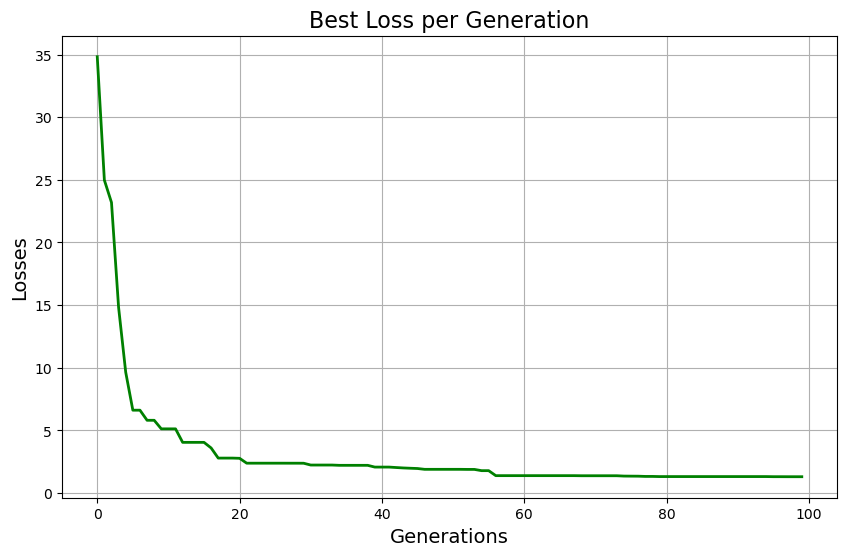

In [38]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
    plt.figure(figsize=(10, 6))
    plt.plot(losses_list, color='green', linewidth=2)
    plt.xlabel("Generations", fontsize=14)
    plt.ylabel("Losses", fontsize=14)
    plt.title("Best Loss per Generation", fontsize=16)
    plt.grid(True)
    plt.show()

losses_list = run_GA()
visualize_loss(losses_list)

Best chromosome: [4.7299112223638105, -0.24505675420409023, -2.687401376628278, 3.4723042378232023]


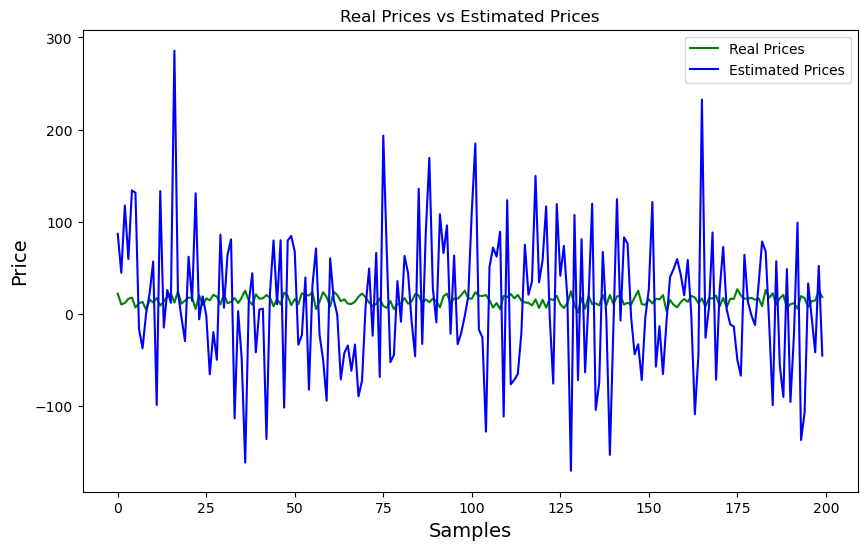

In [39]:
def visualize_predict_gt():
    sorted_population = sorted(population, key=compute_fitness, reverse=True) 
    print("Best chromosome:", sorted_population[0])
    theta = np.array(sorted_population[0]) 
    
    estimated_prices = []
    for feature in features_X:
        estimated_price = np.dot(feature, theta)
        estimated_prices.append(estimated_price)

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples', fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.plot(sales_Y, c='green', label='Real Prices')
    plt.plot(estimated_prices, c='blue', label='Estimated Prices')
    plt.legend()
    plt.title("Real Prices vs Estimated Prices")
    plt.show()

visualize_predict_gt()
